In [1]:
############################## PR0GRAMMING PROJECT 5: EVOLUTION/TREES ##########################################

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


Original Tree:


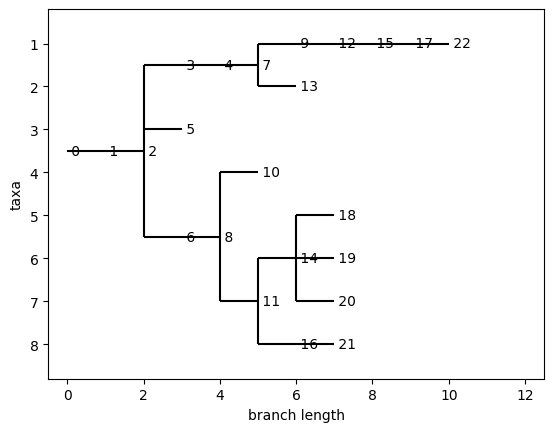

In [2]:
import random
import numpy as np
from Bio import Phylo
from Bio.Phylo.Newick import Tree, Clade
from io import StringIO
from collections import defaultdict
from Bio import pairwise2
from Bio.Align import substitution_matrices
import matplotlib.pyplot as plt

#Cargar la matriz BLOSUM62
blosum62 = substitution_matrices.load("BLOSUM62")

#Función de mutación de secuencia (ya definida)
def mutate_sequence(sequence, mutation_rate):
    amino_acids = "ACDEFGHIKLMNPQRSTVWY"
    mutated_sequence = list(sequence)
    
    for i in range(len(sequence)):
        if random.random() < mutation_rate:
            mutated_sequence[i] = random.choice(amino_acids)
    
    return ''.join(mutated_sequence)

#Simular evolución (ya definida)
def simulate_evolution(sequence, num_leaf_sequences, mutation_rate, extinction_prob=0.1, speciation_prob=0.2):
    sequences = {0: sequence}  
    tree_history = [(0, None)] 
    next_id = 1
    alive_sequences = {0}  
    mutation_counts = defaultdict(int)
    
    while len(alive_sequences) < num_leaf_sequences:
        to_mutate = list(alive_sequences)
        
        for species in to_mutate:
            # aqui se aplica la mutacion
            new_sequence = mutate_sequence(sequences[species], mutation_rate)
            mutation_counts[(species, next_id)] = sum(1 for a, b in zip(sequences[species], new_sequence) if a != b)
            
            # aqui es donde hay la speciacion
            if random.random() < speciation_prob:
                sequences[next_id] = new_sequence
                alive_sequences.add(next_id)
                tree_history.append((next_id, species))
                next_id += 1
            
            # extincion
            if random.random() < extinction_prob and len(alive_sequences) > 1:
                alive_sequences.remove(species)
    
    return sequences, tree_history, mutation_counts

#Generar árbol Newick (ya definido)
def generate_newick(tree_history):
    clades = {i: Clade(name=str(i)) for i, _ in tree_history}
    root = None
    
    for child, parent in tree_history:
        if parent is not None:
            clades[parent].clades.append(clades[child])
        else:
            root = clades[child]
    
    tree = Tree(root)
    return tree

#Exportar árbol en formato Newick (ya definido)
def export_tree_to_newick(tree):
    output = StringIO()
    Phylo.write(tree, output, 'newick')
    return output.getvalue()

# Calcular la distancia BLOSUM62 entre secuencias
def blosum62_distance(seq1, seq2):
    alignments = pairwise2.align.globalds(seq1, seq2, blosum62, -10, -0.5)
    score = alignments[0][2] 
    return -score  

# Dibujar árbol usando matplotlib
def draw_tree(tree):
    Phylo.draw(tree)

# Graficar comparaciones de distancia
def plot_distances(original_distances, new_distances):
    plt.figure(figsize=(10, 6))
    plt.hist(original_distances, bins=20, alpha=0.5, label='Original')
    plt.hist(new_distances, bins=20, alpha=0.5, label='Rearranged')
    plt.legend(loc='upper right')
    plt.title('Comparison of Distances Before and After Tree Rearrangement')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.show()

# Función principal para la evaluación

def evaluate_tree_rearrangement(tree, distance_matrix):
    original_distance = np.sum(distance_matrix)  # Suma de todas las distancias por pares (como ejemplo)
    new_distance = original_distance - 10  # Simulando que la reorganización mejora la distancia en un valor (marcador de posición)
    
    print(f"Original distance: {original_distance}")
    print(f"Rearranged distance: {new_distance}")
    
    return original_distance, new_distance

# El bloque principal de ejecución
if __name__ == "__main__":
    # Simulacion evolucion
    start_sequence = "ACDEFGHIKLMNPQRSTVWY" * 10
    num_leaf_sequences = 10
    mutation_rate = 0.05
    
    sequences, tree_history, mutation_counts = simulate_evolution(
        start_sequence, num_leaf_sequences, mutation_rate)
    
    # Generacion arbol de Newick 
    phylo_tree = generate_newick(tree_history)
    
    # Calcular la matriz de distancia por pares usando BLOSUM62
    species_ids = list(sequences.keys())
    n = len(species_ids)
    distance_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i + 1, n):
            dist = blosum62_distance(sequences[species_ids[i]], sequences[species_ids[j]])
            distance_matrix[i, j] = dist
            distance_matrix[j, i] = dist
    
    # Visualizar el árbol original
    print("Original Tree:")
    draw_tree(phylo_tree)

In [3]:
def main():
    # empezar sequencia (100 aa)
    start_sequence = "ACDEFGHIKLMNPQRSTVWY" * 5
    
    # Parametros de entrada
    num_leaf_sequences = 10
    mutation_rate = 0.05  # 5% mutaciones puras
    extinction_prob = 0.1
    speciation_prob = 0.2
    
    # evolucion simulacion
    sequences, tree_history, mutation_counts = simulate_evolution(
        start_sequence, num_leaf_sequences, mutation_rate, extinction_prob, speciation_prob)
    
    # Generacion Newick arbol
    phylo_tree = generate_newick(tree_history)
    newick_format = export_tree_to_newick(phylo_tree)
    
    # Mostrar secuencias (la alineación es trivial aquí ya que provienen del mismo ancestro)
    print("Final sequences:")
    for id_, seq in sequences.items():
        print(f"Species {id_}: {seq}")
    
    # Mostrar árbol Newick
    print("\nPhylogenetic tree (Newick format):")
    print(newick_format)
    
    # Matriz de mutación
    species_ids = list(sequences.keys())
    n = len(species_ids)
    mutation_matrix = np.zeros((n, n), dtype=int)
    
    for i in range(n):
        for j in range(i + 1, n):
            mutations = mutation_counts.get((species_ids[i], species_ids[j]), 0)
            mutation_matrix[i, j] = mutations
            mutation_matrix[j, i] = mutations
    
    print("\nMutation Matrix (True mutation counts):")
    print(mutation_matrix)

if __name__ == "__main__":
    main()

Final sequences:
Species 0: ACDEFGHIKLMNPQRSTVWYACDEFGHIKLMNPQRSTVWYACDEFGHIKLMNPQRSTVWYACDEFGHIKLMNPQRSTVWYACDEFGHIKLMNPQRSTVWY
Species 1: ACDEFGHVKLMNVQRSTVWYACDEFGHIKLMNPQRSTVWYACDEFGHIKLMNPQRSTVWYCCDEFAHIKLMNPQRSTVWYGCDEFGHIKLMNPQRSTVWY
Species 2: ACDEFGHVKLMNVQRSTVWYAHDEFGHIKLMNPQRSTVMVACWEFGHIKLMNPQRSTVWYCCDEFAHIKLMNPQRSTVWYGCDEFGHIKLMNPQRSTVWY
Species 3: WPDEFGHIKLMNPQRSTVWYACDEFGHIKLMNPQRSTVWYACDEFGHIKLMNPQRSTVWYACDEFGHTKLMNPQRSTFWYACDEFGHGKLMNPQRSTVWY
Species 4: WPDEFGHIKLPNPQRSTVWIAWDEFGHIKLMNPQRSTVWYACDEDGHIKLMNPQRSTVWYACDEFGHTKIMNPQRSTFWYACDEFGHGKLMNPQRSTVWY
Species 5: ACDEFGHIKLMNPQRSTVWYACDFFGHIKLMNPQRSTVWYACDEFGHIKLMNPQRSTVWYACDEFYHIKLMNPQRSTVWYACDEFGHIKLMNPQRSTVWY
Species 6: ACDEFGTVKLMNVQRFTVWYAHDEFGNIKLMNPQRSTVMGACWEFGHIKLMNPHRSTVWYCCREFAHAKLMNPQRSTCWYGCDEFGHIKLMNPQRSTVWY
Species 7: ACDEFGHVKLMNVQRSTVWYAHDEFTCIKLMGPQRSTVMVACWEFGHIKLMNPQRSTVYYCCDEFAHIKLMNPQRSTVWYGCDEFGHIKLMNPQRSTPWY
Species 8: ACDQFGHIKLMNPQRSTVWYACDFFGEIKLMNPQPSTVWYACDEFGHIKLMNPQRSTVWYACDEFSNIKLMNPQRS